In [97]:
import os
import pandas as pd
import os.path as osp
import matplotlib.pyplot as plt

In [98]:
path = osp.join(os.getcwd(), 'ckpts', "sammask_rcnn_2024-07-29 15:23:03", "perf")
path

'/home/cati/Desktop/Dev/Ego-SAM-RCNN/ckpts/sammask_rcnn_2024-07-29 15:23:03/perf'

In [99]:
EMA_FACTOR = 1 - 0.97

----

# All Losses

In [100]:
df = pd.read_csv(osp.join(path, "logs_all_loss.csv"))
df = df[["Step", "Value"]]
df

,Step,Value
0,172,0.686333
1,244,0.562602
2,259,0.395293
3,402,0.654985
4,465,0.464369
...,...,...
995,100643,0.192087
996,100648,0.294458
997,100655,0.200334
998,100775,0.062777


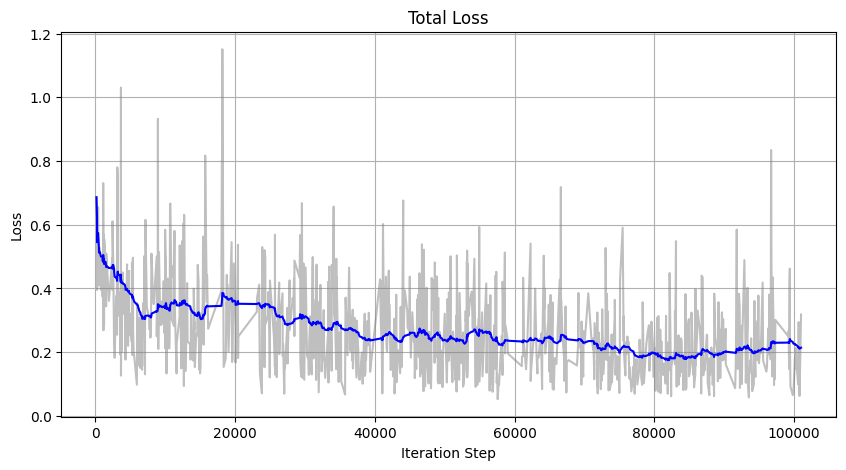

In [118]:
df["mean"] = df["Value"].ewm(alpha=EMA_FACTOR).mean()

plt.figure(figsize=(10, 5))
plt.plot(df["Step"], df["Value"], alpha=0.5, color="gray")
plt.plot(df["Step"], df["mean"], color="blue")

plt.xlabel("Iteration Step")
plt.ylabel("Loss")
plt.grid()
plt.title("Total Loss")
plt.show()

-----

# Plot for each Loss

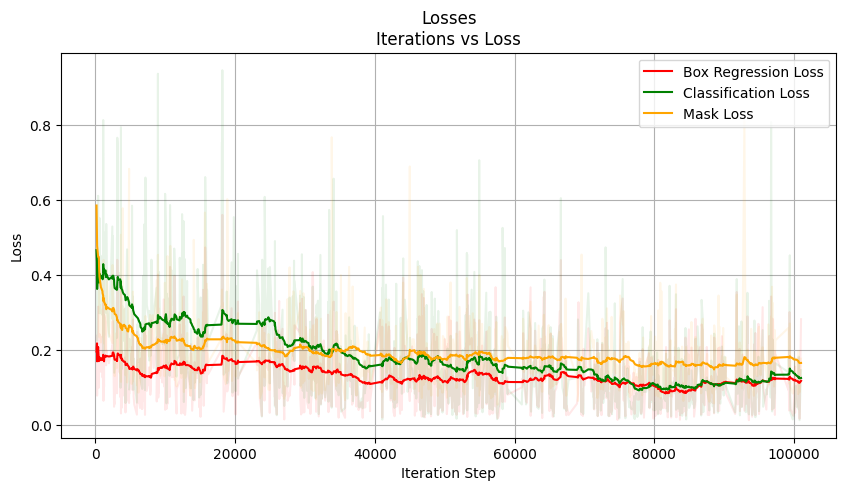

In [115]:
box_reg = pd.read_csv(osp.join(path, "logs_train_all_losses_loss_box_reg.csv"))
box_reg = box_reg[["Step", "Value"]]
box_reg["mean"] = box_reg["Value"].ewm(alpha=EMA_FACTOR).mean()

cls_loss = pd.read_csv(osp.join(path, "logs_train_all_losses_loss_classifier.csv"))
cls_loss = cls_loss[["Step", "Value"]]
cls_loss["mean"] = cls_loss["Value"].ewm(alpha=EMA_FACTOR).mean()

mask_loss = pd.read_csv(osp.join(path, "logs_train_all_losses_loss_mask.csv"))
mask_loss = mask_loss[["Step", "Value"]]
mask_loss["mean"] = mask_loss["Value"].ewm(alpha=EMA_FACTOR).mean()

plt.figure(figsize=(10, 5))
plt.plot(box_reg["Step"], box_reg["Value"], alpha=0.09, color="red", label="_nolegend_")
plt.plot(cls_loss["Step"], cls_loss["Value"], alpha=0.09, color="green", label="_nolegend_")
plt.plot(mask_loss["Step"], mask_loss["Value"], alpha=0.09, color="orange", label="_nolegend_")

plt.plot(box_reg["Step"], box_reg["mean"], color="red")
plt.plot(cls_loss["Step"], cls_loss["mean"], color="green")
plt.plot(mask_loss["Step"], mask_loss["mean"], color="orange")

plt.title("Losses\nIterations vs Loss")
plt.legend(["Box Regression Loss", "Classification Loss", "Mask Loss"], loc="upper right")
plt.xlabel("Iteration Step")
plt.ylabel("Loss")
plt.grid()
plt.show()

----

# mAP Plot

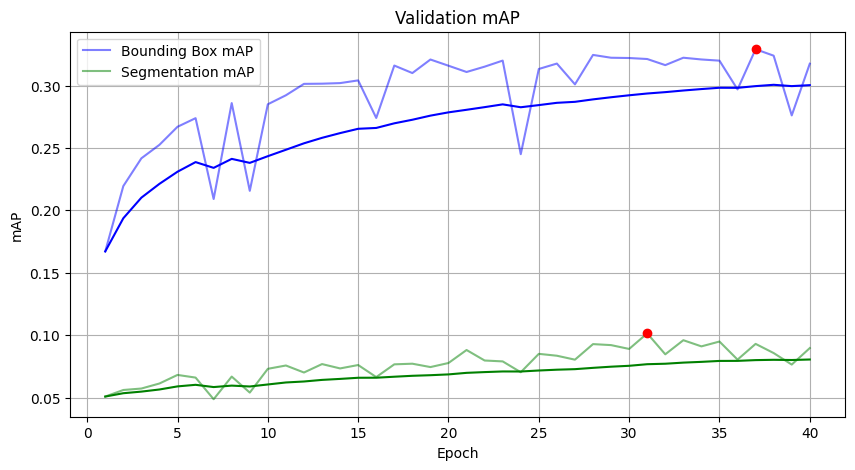

In [126]:
bbox_map = pd.read_csv(osp.join(path, "logs_val_map_bbox_map.csv"))
segm_map = pd.read_csv(osp.join(path, "logs_val_map_segm_map.csv"))

bbox_map = bbox_map[["Step", "Value"]]
segm_map = segm_map[["Step", "Value"]]

bbox_map["mean"] = bbox_map["Value"].ewm(alpha=EMA_FACTOR).mean()
segm_map["mean"] = segm_map["Value"].ewm(alpha=EMA_FACTOR).mean()

plt.figure(figsize=(10, 5))
plt.plot(bbox_map["Step"], bbox_map["Value"], alpha=0.5, color="blue")
plt.plot(segm_map["Step"], segm_map["Value"], alpha=0.5, color="green")
plt.plot(bbox_map["Value"].idxmax() + 1, bbox_map["Value"].max(), marker="o", color="red")

plt.plot(bbox_map["Step"], bbox_map["mean"], color="blue")
plt.plot(segm_map["Step"], segm_map["mean"], color="green")
plt.plot(segm_map["Value"].idxmax() + 1, segm_map["Value"].max(), marker="o", color="red")

plt.title("Validation mAP")
plt.legend(["Bounding Box mAP", "Segmentation mAP"], loc="upper left")
plt.xlabel("Epoch")
plt.ylabel("mAP")
plt.grid()
plt.show()